In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


plt.style.use('dark_background')

/tmp/ipykernel_11053/3561430413.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
# function (as a function)
def custom_function(x):
    return np.sin(3 * np.pi * x) + 0.5 * x ** 3

# derivative function
def custom_derivative(x):
    return 1.5 * np.pi * np.cos(3 * np.pi * x) + 1.5 * x ** 2


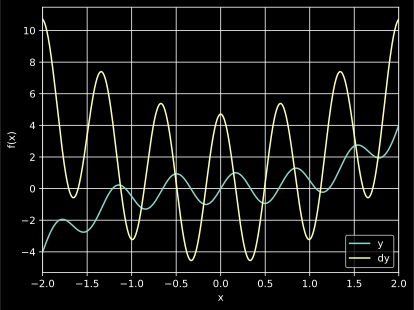

In [3]:
# plot the function and its derivative

# define a range for x
x_values = np.linspace(-2, 2, 2001)

# plotting
plt.plot(x_values, custom_function(x_values), x_values, custom_derivative(x_values))
plt.xlim(x_values[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y', 'dy'])
plt.show()


In [4]:
initial_point2 =  np.random.choice(x_values, 1)
print(initial_point2)

[-0.548]


In [5]:
# random starting point

initial_point=-1.0
learning_rate = 0.01
training_epochs = 14

# run through training
for epoch in range(training_epochs):
    gradient = custom_derivative(initial_point)
    initial_point = initial_point - learning_rate * gradient

found_minima = initial_point#[0]
found_minima


np.float64(-0.8586577773381233)

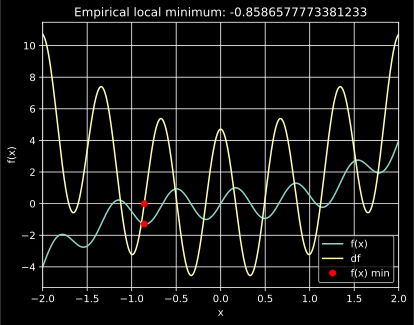

In [6]:
# plot the results
plt.plot(x_values, custom_function(x_values), x_values, custom_derivative(x_values))
plt.plot(found_minima, custom_derivative(found_minima), 'ro')
plt.plot(found_minima, custom_function(found_minima), 'ro')

plt.xlim(x_values[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title('Empirical local minimum: %s' % found_minima)
plt.show()


## __Exploration of Initial Values__

In [11]:
learning_rate = 0.01
training_epochs = 20

In [12]:
def gradient_descent(value: float, epochs: int, lr: float) -> float:
    for epoch in range(epochs):
        gradient = custom_derivative(value)
        value = value - learning_rate * gradient
    return value

In [13]:
# Define eight initial values to explore
initial_values = np.linspace(-1.5, 1.5, 6)
# Calculate the minimum from each initial value
minimums = []

for init_val in initial_values:
    minimums.append(float(gradient_descent(init_val, training_epochs, learning_rate)))

minimums = np.array(minimums)



/tmp/ipykernel_11053/2822069896.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(minimums, custom_function(minimums), 'ro', color='blue')


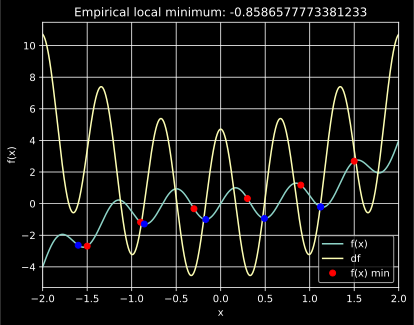

In [14]:
plt.plot(x_values, custom_function(x_values), x_values, custom_derivative(x_values))
plt.plot(initial_values, custom_function(initial_values), 'ro')
# plt.plot(initial_values, custom_derivative(initial_values), 'ro')
plt.plot(minimums, custom_function(minimums), 'ro', color='blue')
# plt.plot(minimums, custom_derivative(minimums), 'ro', color='blue')

plt.xlim(x_values[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title('Empirical local minimum: %s' % found_minima)
plt.show()

## __Summary of Observations__

- The notebook explores the effects of initial values for gradient descent on the convergence to local minima instead of global minima
- Extrapolating from the previous examples, I build a new example above where six initial values points (red) are defined and each one has its respective minimum calculated using the gradient descent algorithm (blue). We can see from above that the found minimums all lie within the valleys of each oscillation meaning that this loss-landscape is very susceptible to having the gradient caught in the local minimums. In one case the initial value is already very close to the minimum and the calculated minimum is actually further away from the true minimum meaning that there is a high degree of oscillation and as a result, overshooting
- Decreasing the learning rate from the base value of 0.01 to 0.001 vastly reduces the speed of the algorithm and more iterations are needed to account for this. Increasing the learning rate from 0.01 to 0.1 causes nearly all of the minimums to overshoot resulting in the calculated minimums being even further away from the local minima
- Overall there need to be a find balance obtained between the learning rate, training epochs, and initial values to create a stable platform for gradient descent